In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:

dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset['v1']=dataset['v1'].map({'ham':0,'spam':1})


In [ ]:
dataset.head()

,v1,v2
0,NaN,"Go until jurong point, crazy.. Available only ..."
1,NaN,Ok lar... Joking wif u oni...
2,NaN,Free entry in 2 a wkly comp to win FA Cup fina...
3,NaN,U dun say so early hor... U c already then say...
4,NaN,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dataset.isnull().sum()

,0
v1,5572
v2,0


<Axes: ylabel='count'>

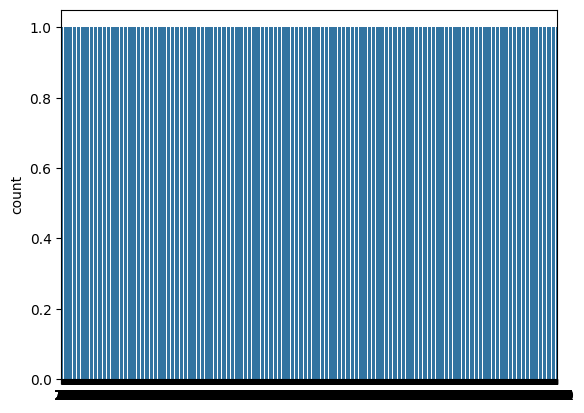

In [ ]:
sns.countplot(dataset['v1'])

In [ ]:
#1
#Data preprocessing
#Libraries
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
#creating an empty list to store the pre-processed data
chans=[]

In [ ]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [ ]:
for i in range(0 , len(dataset)):
  message = re.sub('[^a-zA-Z]' , ' ' , dataset['v2'][i])
  message = message.lower()
  message = message.split()
  c = SnowballStemmer(language='english')
  l=[]
  for i in message:
    if i not in stopwords.words('english'):
      l.append(c.stem(i))
  message = ' '.join(l)
  chans.append(message)

In [ ]:
chans[1]

'ok lar joke wif u oni'

In [ ]:
#Now are creating bag of model using sklearn
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(chans).toarray()
y=dataset.iloc[:,0].values

In [ ]:
print(X.shape)
print(y.shape)

(5572, 6216)
(5572,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457, 6216)
(4457,)
(1115, 6216)
(1115,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm


array([[933,  16],
       [  6, 160]])

In [ ]:
from sklearn.metrics import precision_score,recall_score
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
precision_score(y_test,y_pred)

0.963855421686747
0.9090909090909091


0.9090909090909091

In [ ]:
txt='Welcome to my channer,you can learn free here'
txt=cv.transform([txt]).toarray()
y_pred=model.predict(txt)
if y_pred[0]==0:
  print('ham')
else:
  print('spam')


spam


In [ ]:
import pickle
pickle.dump(model,open('spam1.pkl','wb'))
pickle.dump(cv,open('vectorizer1.pkl','wb'))